In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, mean
from scipy.stats import skew, kurtosis
from tabulate import tabulate
import pywt
from skimage.restoration import denoise_wavelet

In [8]:
data_dir = r"C:\Users\a\Desktop\Road 2 20\PreML\fig_data"
data = pd.read_csv(f"{data_dir}\\testSeasonal1.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'] ,  format = '%Y-%m-%d %H:%M:%S' )
data['Timestamp'] =  data['Timestamp'].dt.strftime('%d')
timestamps =  data['Timestamp'].to_numpy()
data = data.set_index('Timestamp')
Label = "Data"
data.head(),data.tail()


(                Data
 Timestamp           
 11         67.769126
 11         66.952808
 11         65.021858
 11         65.782704
 11         67.198002,
                 Data
 Timestamp           
 21         66.099529
 22         66.293064
 22         73.192753
 22         70.953391
 22         68.499506)

In [9]:
el_var = data[Label]

skw = skew(el_var.dropna())
krts = kurtosis(el_var.dropna())
rms = np.mean(el_var)
minv = el_var.min()
maxv= el_var.max()
std_dev = stats.tstd(el_var)
variance = stats.tvar(el_var)
skw,krts,rms,minv,maxv,std_dev,variance

(-0.9997919989824999,
 0.28093752309260633,
 64.27525364238001,
 44.72092242,
 76.54993625,
 6.317531817113078,
 39.91120826023607)

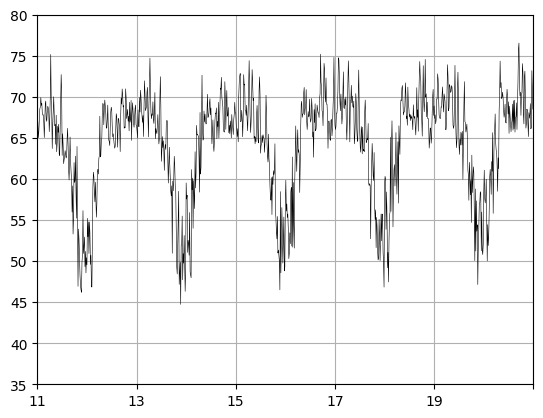

In [10]:
data.plot(color='black', linewidth=0.4)
# plt.step( timestamps,data["Data"],color='black', linewidth=0.3)

plt.ylim(35,80)
plt.xlim(0, 1000)
# plt.xticks([0,58,116,174,232,290,348,406,464,522,580,638,696],["","16h","18h","20h","22h","00h","02h","04h","06h","08h","10h","12h","14h"])


plt.title('')
plt.xlabel('')
# plt.ylabel('Value')
plt.legend('', frameon=False)
plt.grid(True)
# plt.savefig('Point1noised.svg')



In [11]:
better_data = denoise_wavelet(data['Data'].to_numpy(),method = 'BayesShrink', mode = 'soft', wavelet_levels = 3, wavelet = 'sym8', rescale_sigma=True)
better_data

array([67.64475427, 66.72543073, 65.72305356, 66.24408935, 67.54678886,
       68.48682181, 69.02568578, 69.17171652, 68.99378732, 68.66612853,
       68.19320166, 67.79314739, 67.45338099, 66.61027848, 66.0841341 ,
       67.44942996, 69.10923033, 68.59842766, 67.3589179 , 67.33000866,
       67.87701688, 68.71300035, 69.12525499, 67.52625164, 66.23722726,
       67.86056263, 70.06378046, 73.20749307, 70.11405829, 67.82087747,
       65.34795176, 66.3882191 , 68.65774207, 68.81909322, 67.73000187,
       66.81562562, 66.03607236, 65.2363598 , 65.60783513, 64.59458639,
       64.8021752 , 65.76083004, 66.71640351, 65.50457276, 64.03338049,
       64.13303763, 65.59270434, 69.2104263 , 72.10787528, 69.24836417,
       64.23029532, 64.20345315, 64.071554  , 63.44930109, 62.24706602,
       62.53901411, 63.28024116, 62.87043728, 62.39941065, 63.42352082,
       64.6908682 , 64.96832188, 64.35373103, 62.28108137, 60.45956019,
       61.85012983, 63.91830787, 62.84801492, 60.40275489, 58.77

In [12]:
el_var = better_data
skw2 = skew(el_var)
krts2 = kurtosis(el_var)
rms2 = np.mean(el_var)
minv2 = el_var.min()
maxv2= el_var.max()
std_dev2 = stats.tstd(el_var)
variance2 = stats.tvar(el_var)
skw2,krts2,rms2,minv2,maxv2,std_dev2,variance2

(-1.0350662557355226,
 0.18223784409143828,
 64.27628443355067,
 46.10752174990028,
 75.53029235040614,
 6.111141015451584,
 37.346044510734615)

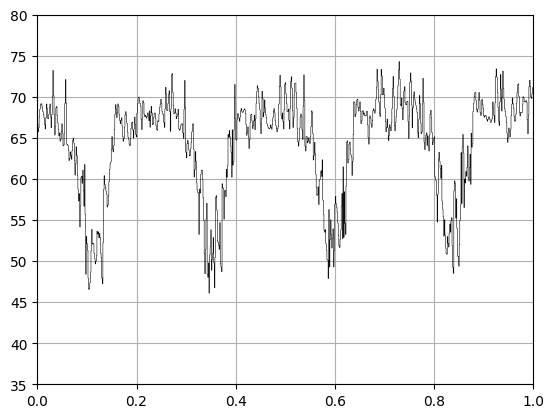

In [14]:
plt.step(np.linspace(0, 1.2, 1000), better_data,color='black', linewidth=0.4)
plt.ylim(35,80)
plt.xlim(0, 1)
# plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2],["","16h","18h","20h","22h","00h","02h","04h","06h","08h","10h","12h","14h"])

plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
# plt.savefig('Point1denoised2.svg')



In [15]:
futures = [
    ["Futures ","RMS", "Skewness", "Kurtosis","Min","Max","Std","Var" ], ["Point 2 before","%.3f" % rms , "%.3f" % skw, "%.5f" % krts,  "%.3f" % minv , "%.3f" % maxv, "%.3f" % std_dev, "%.3f" % variance]
, ["Point 2 after","%.3f" % rms2 , "%.3f" % skw2, "%.5f" % krts2,  "%.3f" % minv2 , "%.3f" % maxv2, "%.3f" % std_dev2, "%.3f" % variance2]
]

print(tabulate(futures,headers = "firstrow",tablefmt=""))

Futures            RMS    Skewness    Kurtosis     Min    Max    Std     Var
--------------  ------  ----------  ----------  ------  -----  -----  ------
Point 2 before  64.275      -1         0.28094  44.721  76.55  6.318  39.911
Point 2 after   64.276      -1.035     0.18224  46.108  75.53  6.111  37.346
